In [1]:
# Connecting two neurons
from sklearn.svm import LinearSVC
from scipy.special import erf
import pylab

import nest

# Create a neuron and poisson spike generators
neuron1 = nest.Create("iaf_psc_alpha")
neuron2 = nest.Create("iaf_psc_alpha")

# Change neurons' parameters
nest.SetStatus(neuron1, {"I_e": 376.0})
nest.SetStatus(neuron2, {"V_th": -60.0})

# Generate analysis apparatus
multimeter = nest.Create("multimeter")
nest.SetStatus(multimeter, {"withtime":True, "record_from":["V_m"]})
spikedetector = nest.Create("spike_detector", params={"withgid": True, "withtime": True})

# Make Connections
nest.Connect(multimeter, neuron1)
nest.Connect(multimeter, neuron2)
nest.Connect(neuron2, spikedetector)
# nest.Connect(neuron1, neuron2, syn_spec={"weight": 20.0})
nest.Connect(neuron1, neuron2, syn_spec={"weight": 500.0, "delay": 1.0})

# Simulate
nest.Simulate(1000.0)

# Get simulation data from the multimeter
dmm = nest.GetStatus(multimeter)[0]
Vms1 = dmm["events"]["V_m"][::2] # start at index 0: till the end: each second entry
ts1 = dmm["events"]["times"][::2]
Vms2 = dmm["events"]["V_m"][1::2] # start at index 1: till the end: each second entry
ts2 = dmm["events"]["times"][1::2]

# Get simulation data from the spike detector
dSD = nest.GetStatus(spikedetector,keys="events")[0]
evs = dSD["senders"]
ts3 = dSD["times"]

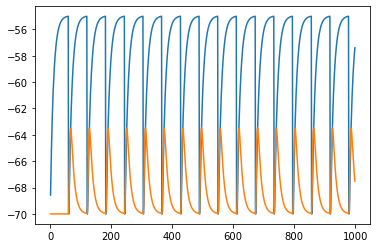

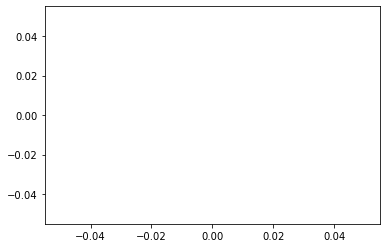

In [2]:
# Plot analysis
pylab.figure(1)
pylab.plot(ts1, Vms1)
pylab.plot(ts2, Vms2)

pylab.figure(2)
pylab.plot(ts3, evs, ".")
pylab.show()